## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## Bussiness objective
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

In [ ]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Standard required packages

# Import the numpy and pandas packages
import numpy as np
import pandas as pd

# Import the matplotlib and seaborn packages to plot different types of charts
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Set number of rows and columns to be displayed
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 1) Reading and Inspection

-  #### Import and read

In [ ]:
# Importing dataset
telecom_churn = pd.read_csv('telecom_churn_data.csv')

# Display dataset surprise_housing
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

-  #### Inspect the dataframe

In [ ]:
# Print the full summary of the dataframe
telecom_churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [ ]:
# Check descriptive statistics
telecom_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


In [ ]:
# Check the shape of data set
telecom_churn.shape

(99999, 226)

In [ ]:
# save original rows count
original_rows = telecom_churn.shape[0]
original_rows

99999

## 2) Filter High-Valued Customers

- High valued customers are the customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months.

In [ ]:
telecom_churn[['total_rech_amt_6', 'total_rech_amt_7']].head()

,total_rech_amt_6,total_rech_amt_7
0,362,252
1,74,384
2,168,315
3,230,310
4,196,350


#### Let's calculate total recharge per customers for the month of June and July

In [ ]:
telecom_churn['AveRechGoodPhase'] = (telecom_churn['total_rech_amt_6'] + telecom_churn['total_rech_amt_7'])//2

telecom_churn[['total_rech_amt_6', 'total_rech_amt_7', 'AveRechGoodPhase']].head()


,total_rech_amt_6,total_rech_amt_7,AveRechGoodPhase
0,362,252,307
1,74,384,229
2,168,315,241
3,230,310,270
4,196,350,273


In [ ]:
percentiles = telecom_churn['AveRechGoodPhase'].quantile([0.50,0.70,0.90]).values
print('50 percentile of Good Phase Recharge : ', percentiles[0])
print('70 percentile of Good Phase Recharge : ', percentiles[1])
print('90 percentile of Good Phase Recharge : ', percentiles[2])

seventyPercentile = percentiles[1]


50 percentile of Good Phase Recharge :  229.0
70 percentile of Good Phase Recharge :  368.0
90 percentile of Good Phase Recharge :  698.0


In [ ]:
telecom_filtered = telecom_churn[telecom_churn['AveRechGoodPhase'] >= seventyPercentile]
telecom_filtered.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,AveRechGoodPhase
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,

In [ ]:
telecom_filtered.shape

(30078, 227)

## 3) Derive Churn (Target variable)

In [ ]:
listOfColsOf9thMonth = list(telecom_filtered.filter(regex='_9'))
listOfColsOf9thMonth.append('sep_vbc_3g')
listOfColsOf9thMonth

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 

### We are focusing on Usage Based Churn.

- Customers is assumed to be Churn if his/her <b>`Data` or `Calling`</b> usage is zero for the month of September (9th month)

#### Variables such as -

- <b>`total_og_mou_9 - `</b> total outgoing call for the month of September

- <b>`total_ic_mou_9 - `</b> total incoming call for the month of September

- <b>`vol_2g_mb_9 - `</b> total 2G data usage for the month of September

- <b>`vol_3g_mb_9 - `</b> total 3G data usage for the month of September

In [ ]:
def isChurned(x):
    if ((x.total_ic_mou_9 == 0) and (x.total_og_mou_9 == 0) and (x.vol_2g_mb_9 == 0) and (x.vol_3g_mb_9 == 0)):
        return 1
    else:
        return 0

telecom_filtered['Churn'] = telecom_filtered.apply(isChurned, axis=1)

In [ ]:
telecom_filtered['Churn'].value_counts(normalize=True)

0    0.913392
1    0.086608
Name: Churn, dtype: float64

#### Drop 9th month columns

In [ ]:
telecom_filtered.drop(listOfColsOf9thMonth,axis=1, inplace=True)
telecom_filtered.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,AveRechGoodPhase,Churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1185,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,

In [ ]:
telecom_filtered.shape

(30078, 173)

## 3) Data Cleaning

In [ ]:
unwanted_col = list(telecom_filtered.filter(regex='date'))
unwanted_col.append('mobile_number')
unwanted_col.append ('circle_id')
unwanted_col

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'mobile_number',
 'circle_id']

In [ ]:
telecom_filtered.drop(unwanted_col,axis=1, inplace=True)
telecom_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,AveRechGoodPhase,Churn
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1185,1
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,NaN,2.0,3.0,NaN,154.0,23.0,NaN,2.0,3.0,NaN,0.0,0.0,NaN,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,NaN,0.0,19.83,NaN,0.0,0.0,NaN,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,NaN,1.0,1.0,315,21.03,910.65,122.16,519,0
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,

In [ ]:
telecom_filtered.shape

(30078, 162)

### Missing Value Analysis

In [ ]:
def checkNullValues(data):
    return round((data.isnull().sum()/len(data.index))*100,2).sort_values(ascending=False)

In [ ]:
# Code for column-wise null percentages
null_counts  = checkNullValues(telecom_filtered)
null_counts[null_counts > 0]

night_pck_user_6      62.05
max_rech_data_6       62.05
arpu_2g_6             62.05
fb_user_6             62.05
total_rech_data_6     62.05
arpu_3g_6             62.05
count_rech_2g_6       62.05
av_rech_amt_data_6    62.05
count_rech_3g_6       62.05
arpu_2g_7             61.18
arpu_3g_7             61.18
av_rech_amt_data_7    61.18
night_pck_user_7      61.18
count_rech_2g_7       61.18
max_rech_data_7       61.18
fb_user_7             61.18
total_rech_data_7     61.18
count_rech_3g_7       61.18
count_rech_3g_8       60.86
count_rech_2g_8       60.86
av_rech_amt_data_8    60.86
max_rech_data_8       60.86
arpu_3g_8             60.86
arpu_2g_8             60.86
total_rech_data_8     60.86
fb_user_8             60.86
night_pck_user_8      60.86
std_og_mou_8           3.15
std_ic_t2o_mou_8       3.15
spl_ic_mou_8           3.15
isd_og_mou_8           3.15
loc_og_t2t_mou_8       3.15
spl_og_mou_8           3.15
std_ic_mou_8           3.15
og_others_8            3.15
std_ic_t2f_mou_8    

#### As we know 'RECH' means recharge. In dataset if 'RECH' is 'NaN' means that day recharge might have not happen. So let's create list of column with RECH and impute with '0'

In [ ]:
rechCols = list(telecom_filtered.filter(regex='rech'))
rechCols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [ ]:
telecom_filtered[rechCols].describe().T

,count,mean,std,min,25%,50%,75%,max
total_rech_num_6,30078.0,12.114935,9.539097,0.0,6.00,9.0,15.0,307.0
total_rech_num_7,30078.0,11.909236,9.602417,0.0,6.00,9.0,15.0,138.0
total_rech_num_8,30078.0,10.222222,9.477290,0.0,4.00,8.0,13.0,196.0
total_rech_amt_6,30078.0,696.704701,538.964799,0.0,431.25,584.0,837.0,35190.0
total_rech_amt_7,30078.0,695.159785,561.829673,0.0,426.00,580.0,834.0,40335.0
total_rech_amt_8,30078.0,613.014994,601.401241,0.0,308.00,520.0,789.0,45320.0
max_rech_amt_6,30078.0,171.285824,174.556910,0.0,110.00,120.0,200.0,4010.0
max_rech_amt_7,30078.0,175.487399,181.402790,0.0,110.00,128.0,200.0,4010.0
max_rech_amt_8,30078.0,162.725913,172.491254,0.0,67.00,130.0,198.0,4449.0
total_rech_data_6,11415.0,2.469996,2.952422,1.0,1.00,1.0,3.0,61.0


In [ ]:
telecom_filtered[rechCols] = telecom_filtered[rechCols].apply(lambda x : x.replace(np.NaN,0))

In [ ]:
# Code for column-wise null percentages
null_counts  = checkNullValues(telecom_filtered)
null_counts[null_counts > 0]

arpu_3g_6           62.05
arpu_2g_6           62.05
fb_user_6           62.05
night_pck_user_6    62.05
arpu_3g_7           61.18
arpu_2g_7           61.18
night_pck_user_7    61.18
fb_user_7           61.18
night_pck_user_8    60.86
arpu_2g_8           60.86
arpu_3g_8           60.86
fb_user_8           60.86
loc_ic_mou_8         3.15
loc_og_mou_8         3.15
loc_ic_t2m_mou_8     3.15
std_og_t2t_mou_8     3.15
loc_ic_t2f_mou_8     3.15
std_og_t2m_mou_8     3.15
ic_others_8          3.15
std_og_t2f_mou_8     3.15
loc_ic_t2t_mou_8     3.15
std_og_t2c_mou_8     3.15
loc_og_t2c_mou_8     3.15
std_og_mou_8         3.15
isd_og_mou_8         3.15
og_others_8          3.15
std_ic_t2t_mou_8     3.15
loc_og_t2f_mou_8     3.15
std_ic_t2o_mou_8     3.15
loc_og_t2t_mou_8     3.15
offnet_mou_8         3.15
roam_og_mou_8        3.15
std_ic_mou_8         3.15
std_ic_t2m_mou_8     3.15
spl_ic_mou_8         3.15
roam_ic_mou_8        3.15
loc_og_t2m_mou_8     3.15
onnet_mou_8          3.15
std_ic_t2f_m

#### Handling FB user/night_pck as they seem to be categorical. Hence, create another category for NaN.

In [ ]:
fbCols = list(telecom_filtered.filter(regex='fb'))
fbCols

['fb_user_6', 'fb_user_7', 'fb_user_8']

In [ ]:
telecom_filtered[fbCols] = telecom_filtered[fbCols].apply(lambda x : x.replace(np.NaN,-1))
telecom_filtered[fbCols].head()

,fb_user_6,fb_user_7,fb_user_8
7,-1.0,-1.0,-1.0
8,-1.0,1.0,1.0
13,-1.0,-1.0,1.0
16,-1.0,-1.0,-1.0
17,-1.0,-1.0,-1.0


In [ ]:
nightpckCols = list(telecom_filtered.filter(regex='night'))
nightpckCols

['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']

In [ ]:
telecom_filtered[nightpckCols] = telecom_filtered[nightpckCols].apply(lambda x : x.replace(np.NaN,-1))
telecom_filtered[nightpckCols].head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8
7,-1.0,-1.0,-1.0
8,-1.0,0.0,0.0
13,-1.0,-1.0,0.0
16,-1.0,-1.0,-1.0
17,-1.0,-1.0,-1.0


In [ ]:
## convert them to categorical Variables.
telecom_filtered[fbCols] = telecom_filtered[fbCols].astype('category')
telecom_filtered[nightpckCols] = telecom_filtered[nightpckCols].astype('category')
telecom_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30078 entries, 7 to 99997
Columns: 162 entries, loc_og_t2o_mou to Churn
dtypes: category(6), float64(129), int64(27)
memory usage: 36.2 MB


#### List of columns which has null values greater than 60%

In [ ]:
# Code for column-wise null percentages
null_counts  = checkNullValues(telecom_filtered)
colsGreterThan60 = list(null_counts[null_counts > 60].index)
colsGreterThan60

['arpu_3g_6', 'arpu_2g_6', 'arpu_3g_7', 'arpu_2g_7', 'arpu_2g_8', 'arpu_3g_8']

In [ ]:
telecom_filtered[colsGreterThan60].describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_3g_6,11415.0,142.072055,255.135024,-30.28,0.00,22.070,212.17,6362.28
arpu_2g_6,11415.0,132.184124,225.474774,-15.32,0.01,40.200,212.17,6433.76
arpu_3g_7,11677.0,143.656628,259.365908,-26.04,0.00,21.910,212.17,4980.90
arpu_2g_7,11677.0,133.277400,230.687344,-15.48,0.00,35.000,212.17,4809.36
arpu_2g_8,11774.0,122.040950,212.508392,-24.43,0.00,21.400,212.17,3467.17
arpu_3g_8,11774.0,132.978224,240.204955,-20.04,0.00,11.315,212.17,3716.90


#### These columns doesn't seems to be important as they can be derived from other columns. So, we can drop them.

In [ ]:
telecom_filtered.drop(colsGreterThan60,axis=1, inplace=True)
telecom_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,AveRechGoodPhase,Churn
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,1185,1
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,519,0
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,29

#### Handling all the remaining null values

In [ ]:
telecom_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
loc_og_t2o_mou,29964.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
std_og_t2o_mou,29964.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
loc_ic_t2o_mou,29964.0,0.000000,0.000000,0.000,0.00000,0.0000,0.00000,0.000
arpu_6,30078.0,586.713880,442.438768,-2258.709,363.86250,494.9830,703.24675,27731.088
arpu_7,30078.0,588.498684,462.615812,-2014.045,364.51125,493.0155,700.11275,35145.834
arpu_8,30078.0,534.279892,491.943325,-945.808,289.30525,451.5610,670.40300,33543.624
onnet_mou_6,29761.0,298.806643,461.821077,0.000,42.84000,128.1800,356.68000,7376.710
onnet_mou_7,29774.0,307.006649,482.844727,0.000,42.58000,127.7500,363.80250,8157.780
onnet_mou_8,29132.0,275.879418,471.127403,0.000,32.11000,106.1100,309.22500,10752.560
offnet_mou_6,29761.0,422.083605,470.777208,0.000,141.26000,285.7800,527.09000,8362.360


In [ ]:
# Based on the above statistical summary, we can remove following columns
remove_cols = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6','std_og_t2c_mou_7',
               'std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']

telecom_filtered.drop(remove_cols,axis=1,inplace=True)
telecom_filtered.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,AveRechGoodPhase,Churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,1185,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,519,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,

In [ ]:
# Code for column-wise null percentages
null_counts  = checkNullValues(telecom_filtered)
nullCols = null_counts[null_counts > 0]

In [ ]:
telecom_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,30078.0,586.713880,442.438768,-2258.709,363.86250,494.9830,703.24675,27731.088
arpu_7,30078.0,588.498684,462.615812,-2014.045,364.51125,493.0155,700.11275,35145.834
arpu_8,30078.0,534.279892,491.943325,-945.808,289.30525,451.5610,670.40300,33543.624
onnet_mou_6,29761.0,298.806643,461.821077,0.000,42.84000,128.1800,356.68000,7376.710
onnet_mou_7,29774.0,307.006649,482.844727,0.000,42.58000,127.7500,363.80250,8157.780
onnet_mou_8,29132.0,275.879418,471.127403,0.000,32.11000,106.1100,309.22500,10752.560
offnet_mou_6,29761.0,422.083605,470.777208,0.000,141.26000,285.7800,527.09000,8362.360
offnet_mou_7,29774.0,427.887324,486.722876,0.000,139.45250,285.2300,536.29000,9667.130
offnet_mou_8,29132.0,386.885514,479.934573,0.000,107.61750,251.2900,493.41750,14007.340
roam_ic_mou_6,29761.0,17.619052,79.597974,0.000,0.00000,0.0000,0.00000,2613.310


In [ ]:
# imputing NaN with median value
telecom_filtered[nullCols.index] = telecom_filtered[nullCols.index].apply(lambda x : x.replace(np.NaN,x.median()))

In [ ]:
# Code for column-wise null percentages
null_counts  = checkNullValues(telecom_filtered)
null_counts[null_counts > 0]

Series([], dtype: float64)

#### Now we have clean data i.e. we do not have Null values in any columns

#### Retained rows

In [ ]:
print('Retaied rows : ', round((len(telecom_filtered.index)/original_rows)*100,2))

Retaied rows :  30.08


## 4) Creating devired variables

### Information about data
Dataset provided has customers data for month of June, July, August and September.

Using the behaviour of first three months we need to prdect churn for the month of September

<B>good phase - </B>the customer is happy with the service and behaves as usual. First two months (June, July) are considered to be good phase of customer

<B>action phase - </B>the customer experience starts to sore in this phase. Third month (August) is consider as action phase

<B>churn phase - </B>the customer is said to have churned. Fourth month (September) is consider as churn phase


In [ ]:
#### On Total columns
totalCols = list(telecom_filtered.filter(regex='total'))
totalCols

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8']

In [ ]:
#### Create a new variable that highlight the churn phase for total recharge amount
telecom_filtered['total_rech_amt_churnPhs'] =telecom_filtered['total_rech_amt_8']- ((telecom_filtered['total_rech_amt_7']
                                                         + telecom_filtered['total_rech_amt_6'])//2)
telecom_filtered['total_rech_amt_churnPhs'].head()

7     2453
8     -399
13     337
16    -299
17    -378
Name: total_rech_amt_churnPhs, dtype: int64

In [ ]:
#### Create a new variable that highlight the churn phase for outgoing MOU
telecom_filtered['total_og_mou_churnPhs'] =telecom_filtered['total_og_mou_8']- ((telecom_filtered['total_og_mou_6']
                                                         + telecom_filtered['total_og_mou_7'])//2)
telecom_filtered['total_og_mou_churnPhs'].head()

7    -197.84
8    -298.44
13    466.26
16    -82.62
17   -625.00
Name: total_og_mou_churnPhs, dtype: float64

In [ ]:
#### On volume columns - Internet usage
volCols = list(telecom_filtered.filter(regex='vol'))
volCols

['vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8']

In [ ]:
#### Create a new variable that highlight the churn phase for 3g usage
telecom_filtered['vol_3g_mb_churnPhs'] =telecom_filtered['vol_3g_mb_8']- ((telecom_filtered['vol_3g_mb_6']
                                                         + telecom_filtered['vol_3g_mb_7'])//2)
telecom_filtered['vol_3g_mb_churnPhs'].head()

7       0.00
8    -363.06
13      0.00
16      0.00
17      0.00
Name: vol_3g_mb_churnPhs, dtype: float64

In [ ]:
#### Create a new variable that highlight the churn phase for 2g usage
telecom_filtered['vol_2g_mb_churnPhs'] =telecom_filtered['vol_2g_mb_8']- ((telecom_filtered['vol_2g_mb_6']
                                                         + telecom_filtered['vol_2g_mb_7'])//2)
telecom_filtered['vol_2g_mb_churnPhs'].head()

7       0.00
8    -177.97
13      0.02
16      0.00
17      0.00
Name: vol_2g_mb_churnPhs, dtype: float64

## 5) Perform EDA

In [ ]:
#Initial setup for the plots
plt.style.use('ggplot')
plt.rcParams['font.size']=8
plt.rcParams['patch.edgecolor'] = 'k'

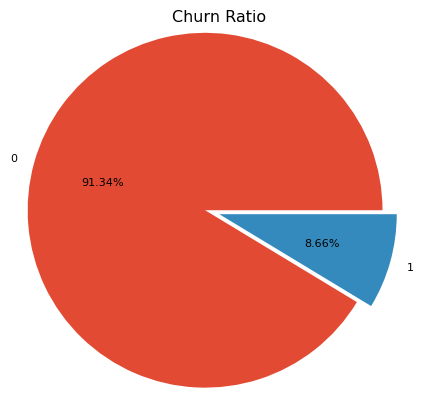

In [ ]:
#Analyze target column for imbalance
data = [telecom_filtered.Churn.value_counts()[0], telecom_filtered.Churn.value_counts()[1]]

plt.pie(data, explode=(0.1,0), labels=['0','1'],autopct='%1.2f%%',radius=1.2)
plt.title("Churn Ratio")
plt.show()

###### Based on the above analysis, we could see that the we have imbalanced target data which needs to be corrected.

### Univariate Analysis

Analyse few of the numerical variables

In [ ]:
#Analyze 'rech' columns
analyzeCols = list(telecom_filtered.filter(regex='rech'))
analyzeCols


['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_churnPhs']

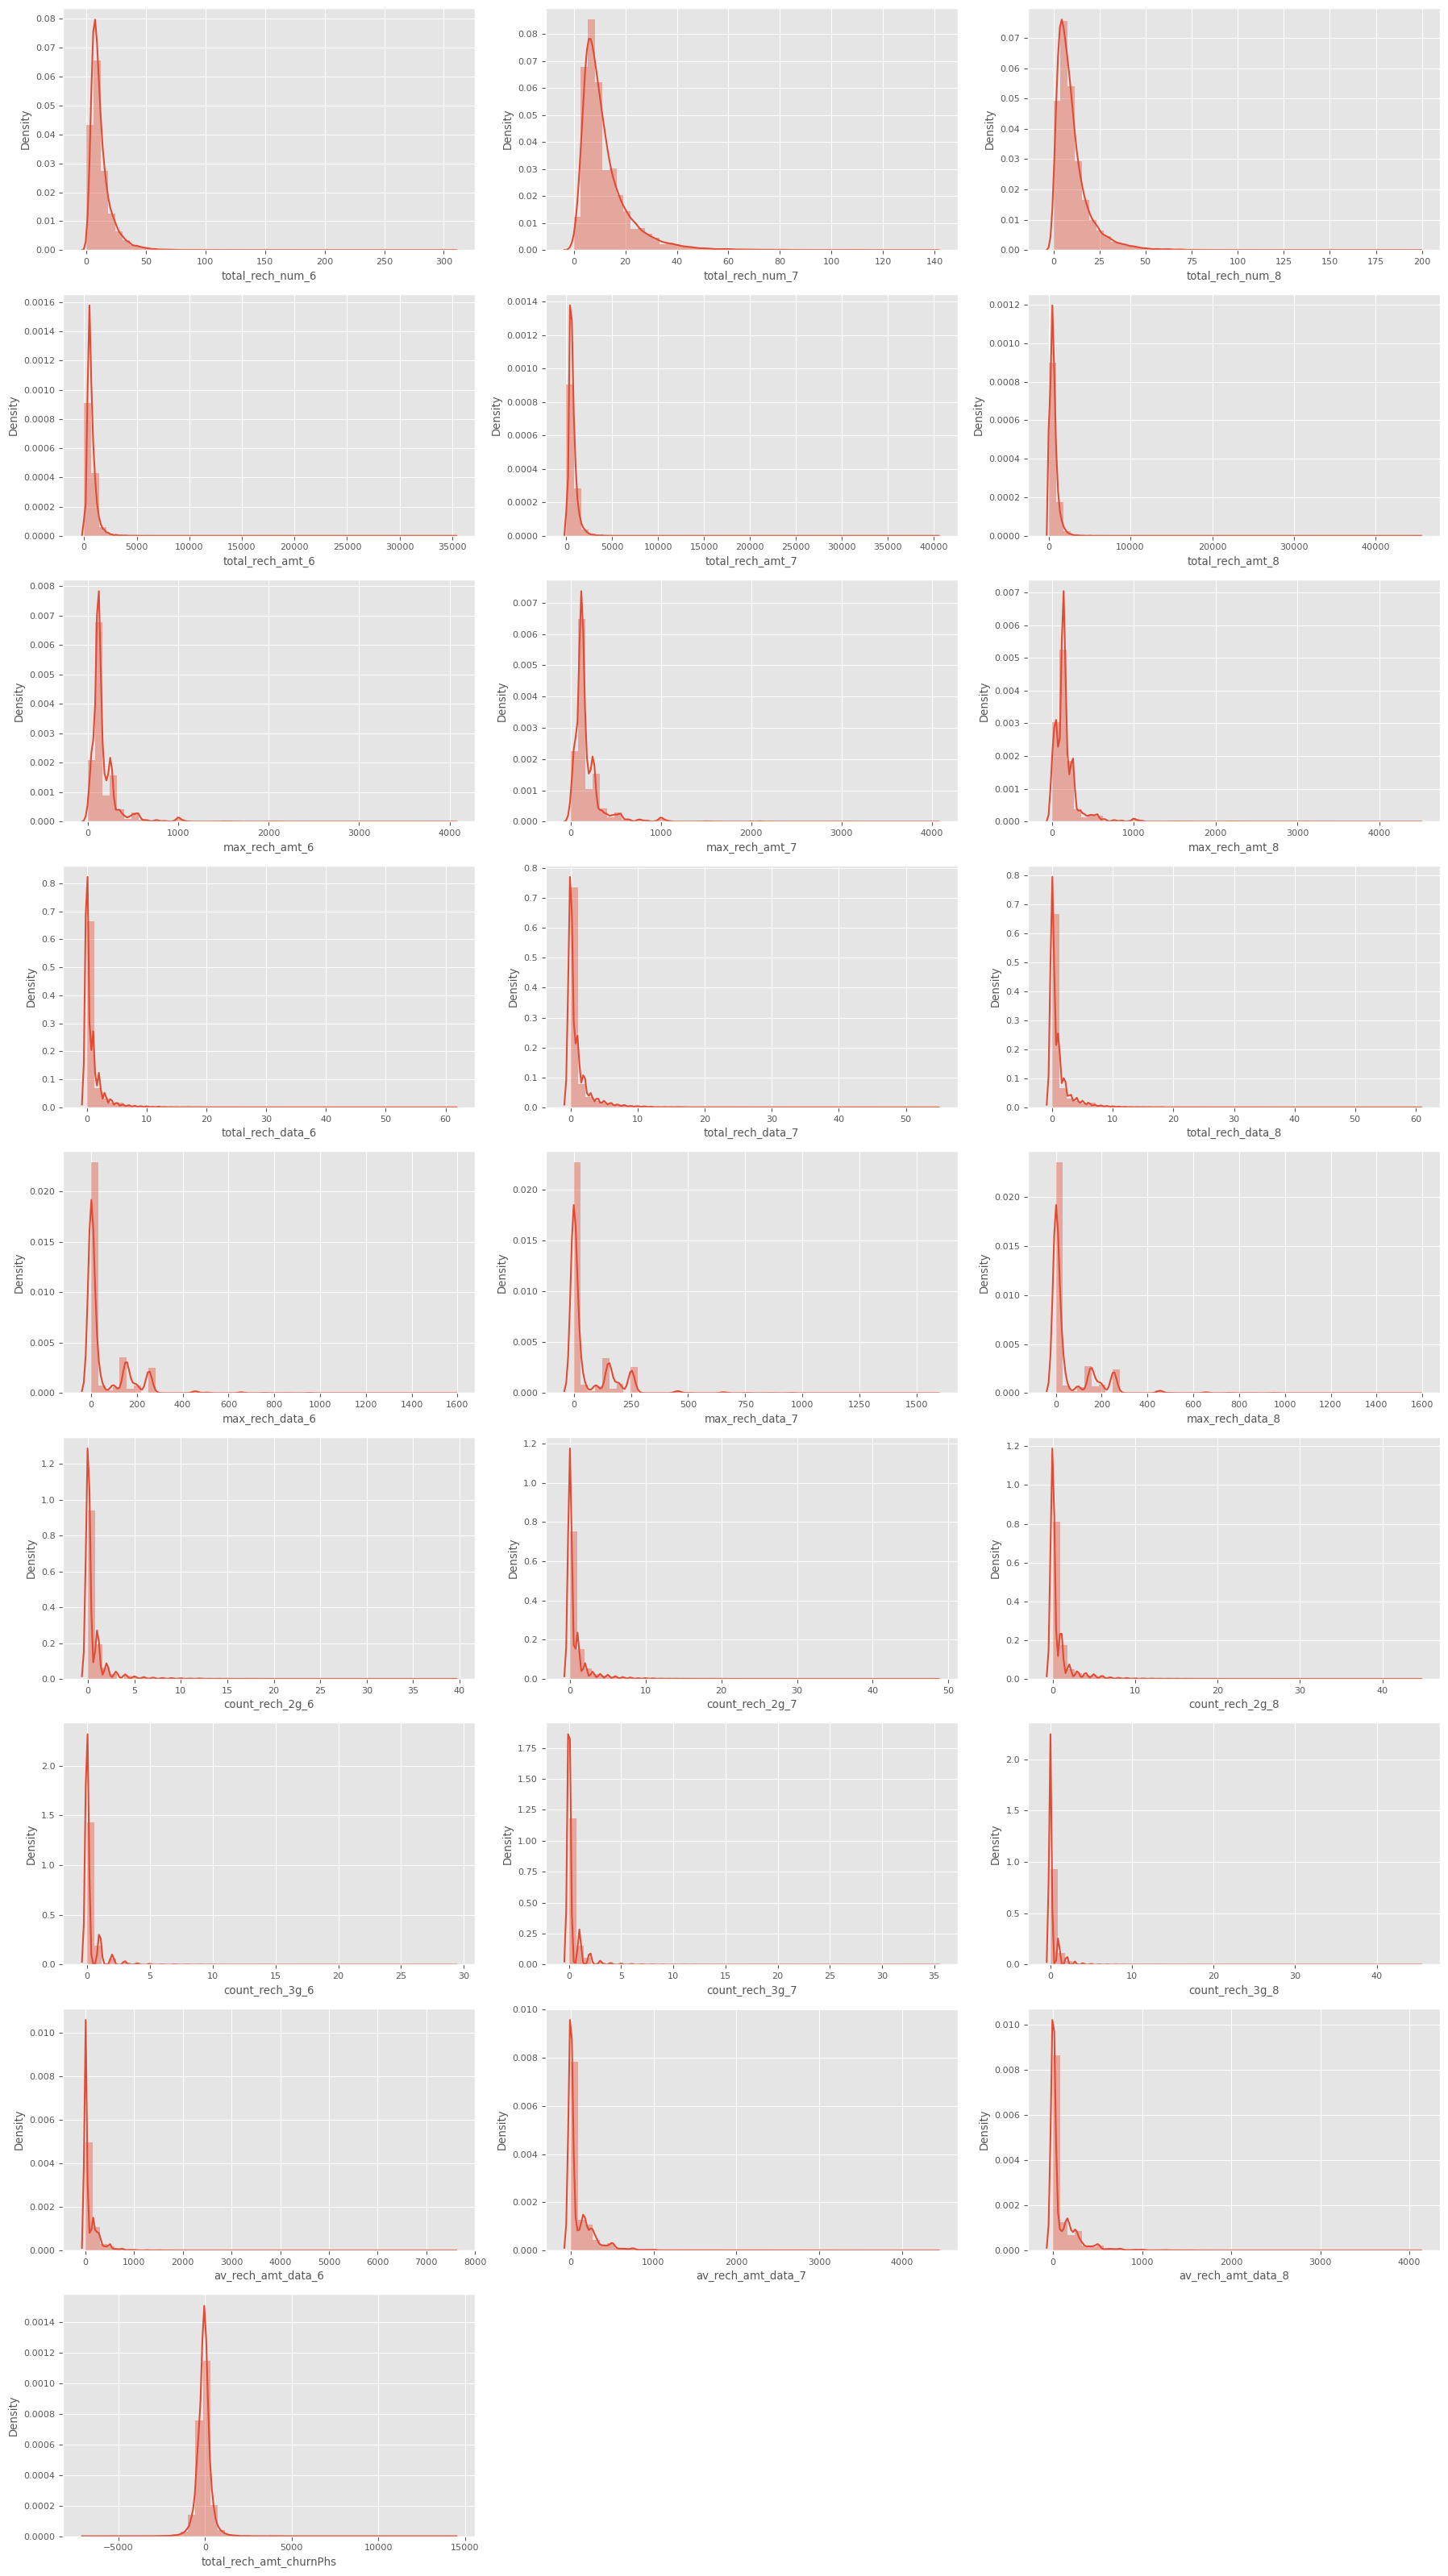

In [ ]:
plt.figure(figsize=(18,32))
for i in enumerate(analyzeCols):
    plt.subplot(9, 3, i[0]+1)
    sns.distplot(telecom_filtered[i[1]])
plt.tight_layout()
plt.show()

### Bivariate Analysis

In [ ]:
def plotBivariate(xdata, ydata):
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=xdata, y=ydata,hue=telecom_filtered.Churn,data=telecom_filtered)
    plt.show()

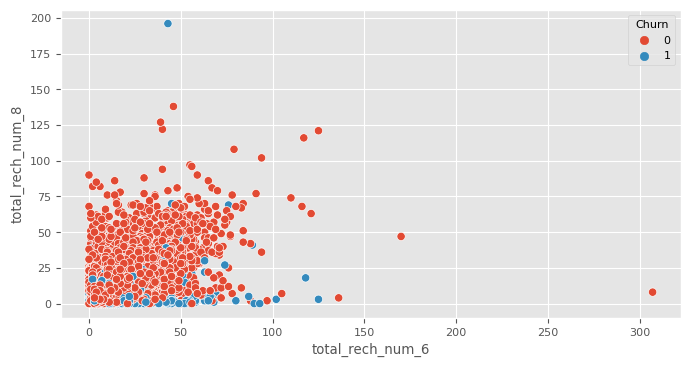

In [ ]:
plotBivariate(telecom_filtered.total_rech_num_6,telecom_filtered.total_rech_num_8)

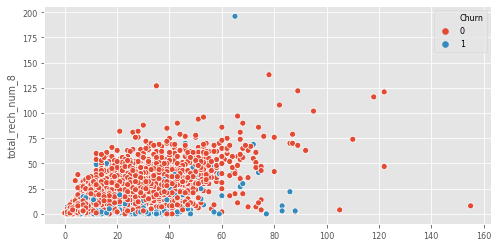

In [ ]:
plotBivariate((telecom_filtered.total_rech_num_7+telecom_filtered.total_rech_num_6)//2,telecom_filtered.total_rech_num_8)

In [ ]:
def plotBoxPlot(cols):
    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1)
    sns.boxplot(x='Churn',y=cols+"_6",hue='Churn',data=telecom_filtered)
    plt.subplot(1,3,2)
    sns.boxplot(x='Churn',y=cols+"_7",hue='Churn',data=telecom_filtered)
    plt.subplot(1,3,3)
    sns.boxplot(x='Churn',y=cols+"_8",hue='Churn',data=telecom_filtered)
    plt.show()

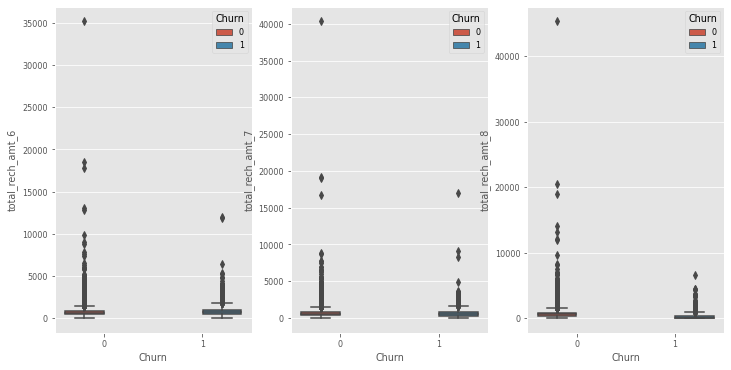

In [ ]:
plotBoxPlot('total_rech_amt')

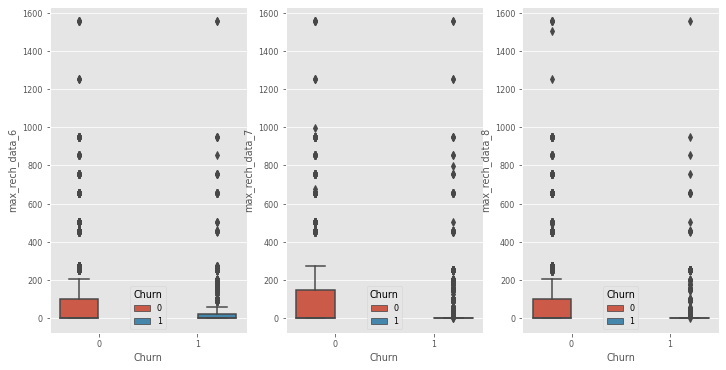

In [ ]:
plotBoxPlot('max_rech_data')

###### Looking at the few of the box plots we see the presence of outliers. We'll first handle the outliers and then viualize the boxplot

## 6) Handling Outliers

In [ ]:
numeric_Cols = list(telecom_filtered.select_dtypes(exclude=['category']).columns)
numeric_Cols.remove('Churn')
numeric_Cols

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [ ]:
telecom_filtered[numeric_Cols].describe().T

,count,mean,std,min,25%,50%,75%,max
arpu_6,30078.0,586.713880,442.438768,-2258.709,363.86250,494.9830,703.24675,27731.088
arpu_7,30078.0,588.498684,462.615812,-2014.045,364.51125,493.0155,700.11275,35145.834
arpu_8,30078.0,534.279892,491.943325,-945.808,289.30525,451.5610,670.40300,33543.624
onnet_mou_6,30078.0,297.008364,459.711259,0.000,43.41500,128.1800,352.79750,7376.710
onnet_mou_7,30078.0,305.194892,480.732878,0.000,43.18250,127.7500,359.21750,8157.780
onnet_mou_8,30078.0,270.539905,464.604974,0.000,33.94500,106.1100,297.23250,10752.560
offnet_mou_6,30078.0,420.647066,468.496554,0.000,142.61500,285.7800,522.83250,8362.360
offnet_mou_7,30078.0,426.445478,484.467071,0.000,141.04500,285.2300,532.20500,9667.130
offnet_mou_8,30078.0,382.620824,472.919225,0.000,111.63250,251.2900,482.36000,14007.340
roam_ic_mou_6,30078.0,17.433360,79.197838,0.000,0.00000,0.0000,0.00000,2613.310


In [ ]:
# Using capping method to handle outliers

for i in numeric_Cols:
    Q1 = telecom_filtered[i].quantile(0.01)
    Q4 = telecom_filtered[i].quantile(0.99)
    telecom_filtered[i][telecom_filtered[i] < Q1] = Q1
    telecom_filtered[i][telecom_filtered[i] > Q4] = Q4


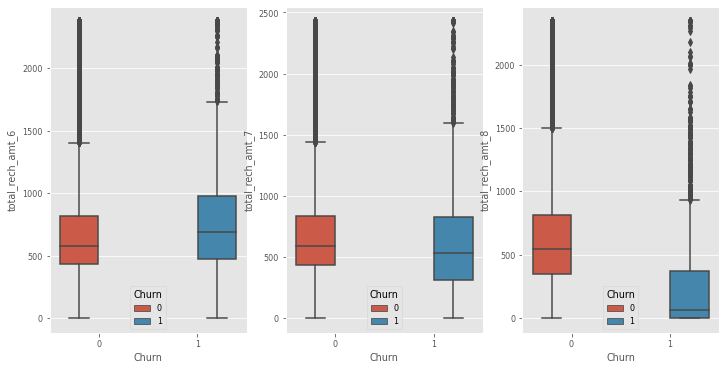

In [ ]:
plotBoxPlot('total_rech_amt')

###### Based on the above view we could see that for the churn customer the total rech amount compared to good months has been reduced in Aug (action month)  

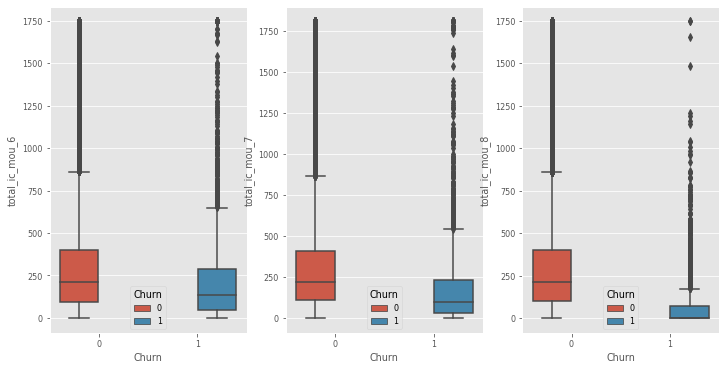

In [ ]:
plotBoxPlot('total_ic_mou')

###### Based on the above view we could see that for the churn customer the total incoming calls has started decreasing from the month of July

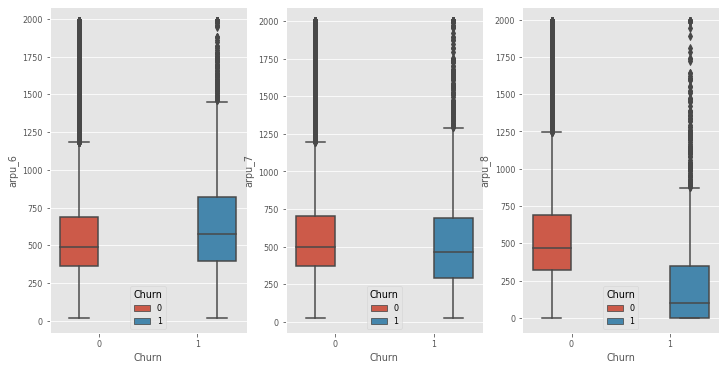

In [ ]:
plotBoxPlot('arpu')

###### Based on the above view we could see that for the churn customer the avg revenue has started decreasing from the month of July

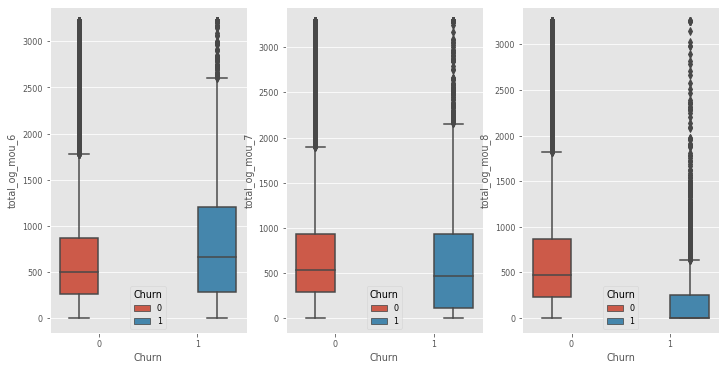

In [ ]:
plotBoxPlot('total_og_mou')

###### Based on the above view we could see that for the churn customer the total out-going calls has significantly decreased in the month of Aug

In [ ]:
telecom_filtered.shape

(30078, 151)

## 7) Dummy Variables

In [ ]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom_filtered[fbCols], drop_first=True)

# Adding the results to the master dataframe
telecom_filtered = pd.concat([telecom_filtered, dummy1], axis=1)

In [ ]:
telecom_filtered.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,AveRechGoodPhase,Churn,total_rech_amt_churnPhs,total_og_mou_churnPhs,vol_3g_mb_churnPhs,vol_2g_mb_churnPhs,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0
7,1069.180,1349.8500,1987.13978,57.84,54.68,52.29,453.43,567.1600,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.0600,14.53,31.5900,15.7400,15.19,15.14,5,5,7,1580,790.0,2341.23,1000,790,951,0,0,619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,1185.0,1,1036.23,-197.84,0.00,0.00,0,0,0,0,0,0
8,378.721,492.2230,137.36200,413.69,351.03,35.08,94.66,80.6300,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.0000,0.00,0.0000,0.0000,0.00,0.00,19,21,14,437,601.0,120.00,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122.16,519.0,0,-399.00,-298.44,-363.06,-177.97,0,0,0,1,0,1
13,492.846,205.6710,593.26000,501.76,108.39,534.24,413.31,119.2800,482.46,23.53,14

In [ ]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom_filtered[nightpckCols], drop_first=True)

# Adding the results to the master dataframe
telecom_filtered = pd.concat([telecom_filtered, dummy1], axis=1)
telecom_filtered.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,AveRechGoodPhase,Churn,total_rech_amt_churnPhs,total_og_mou_churnPhs,vol_3g_mb_churnPhs,vol_2g_mb_churnPhs,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0
7,1069.180,1349.8500,1987.13978,57.84,54.68,52.29,453.43,567.1600,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.0600,14.53,31.5900,15.7400,15.19,15.14,5,5,7,1580,790.0,2341.23,1000,790,951,0,0,619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,1185.0,1,1036.23,-197.84,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0
8,378.721,492.2230,137.36200,413.69,351.03,35.08,94.66,80.6300,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.0000,0.00,0.0000,0.0000,0.00,0.00,19,21,14,437,601.0,120.00,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,-1.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,-1.0,1.0,1.0,315,21.03,910.65,122

In [ ]:
## drop the additional columns
telecom_filtered.drop(nightpckCols , inplace=True, axis=1)
telecom_filtered.drop(fbCols, inplace=True , axis=1)

## 8) Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = telecom_filtered.drop("Churn", axis = 1)
y = telecom_filtered.Churn

### Test-Train Split

In [ ]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify = y)

In [ ]:
print(X_train.shape, X_test.shape)

(21054, 156) (9024, 156)


### Feature Scaling

In [ ]:
scaler = StandardScaler()

X_train[numeric_Cols] = scaler.fit_transform(X_train[numeric_Cols])

X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,AveRechGoodPhase,total_rech_amt_churnPhs,total_og_mou_churnPhs,vol_3g_mb_churnPhs,vol_2g_mb_churnPhs,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0
68209,1.349127,-0.656173,0.604491,-0.222894,-0.575906,-0.627905,-0.650102,-0.915934,-0.914652,-0.289811,-0.262006,-0.263743,-0.309158,-0.284424,-0.279324,-0.094302,-0.511862,-0.468694,-0.295685,-0.779868,-0.782979,-0.258020,-0.439881,-0.368348,-0.335661,-0.213432,-0.335865,-0.271441,-0.803004,-0.772395,-0.154509,-0.383412,-0.467503,-0.547756,-0.515318,-0.509301,-0.24749,-0.244544,-0.24212,-0.469366,-0.597887,-0.634526,-0.165376,-0.166124,-0.155011,1.830578,-0.451277,-0.495415,0.851088,0.0,0.0,-0.547760,-0.986392,-0.961144,-0.143039,-0.354211,-0.429264,0.027673,-0.345578,-0.481316,0.579248,-0.287578,-0.151149,0.009334,-0.423961,-0.524773,-0.131925,-0.346537,-0.386033,-0.479738,-0.484382,-0.472936,-0.280012,-0.281879,-0.28107,-0.424861,-0.501556,-0.508568,0.078597,-0.405195,-0.571584,-0.440784,-0.203479,-0.255575,1.804116,0.226705,-0.258004,2.835173,7.070413,4.262524,0.117791,-0.537954,-0.699299,1.008339,-0.445257,0.451182,0.548636,0.039099,0.624277,-0.459691,0.681939,1.446937,0.652693,0.005493,1.109115,2.083637,1.284308,2.110240,-0.41132,-0.423602,-0.435585,2.420264,0.866665,3.479345,2.661897,0.517699,4.178401,2.473275,-0.333173,-0.231091,2.963933,-0.353022,5.25014,-0.336052,-0.339561,-0.322196,-0.334223,-0.350558,-0.371432,3.634622,1.585033,5.564498,-0.235002,-0.232814,-0.216864,-0.014454,1.398578,-0.370596,2.468094,0.314750,0.252408,-0.266124,4.736240,-1.820312,0,1,0,1,0,1,1,0,1,0,1,0
84689,-0.380538,-0.375499,1.049705,-0.430961,-0.261527,-0.234629,-0.452535,-0.592543,-0.405737,-0.289811,-0.262006,6.793924,-0.309158,-0.284424,4.293096,0.084710,0.319005,-0.374572,-0.202955,-0.358992,-0.663709,1.089531,1.096095,0.040092,0.0561

In [ ]:
X_test[numeric_Cols] = scaler.transform(X_test[numeric_Cols])

X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,AveRechGoodPhase,total_rech_amt_churnPhs,total_og_mou_churnPhs,vol_3g_mb_churnPhs,vol_2g_mb_churnPhs,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0
15017,-0.793597,-0.570583,-1.076751,-0.465767,-0.272298,-0.482615,-0.852108,-0.882674,-0.912041,-0.289811,-0.262006,-0.263743,-0.309158,-0.284424,-0.279324,-0.381480,-0.275142,-0.332019,-0.809553,-0.776335,-0.778594,-0.433035,-0.439881,-0.426078,-0.335661,-0.343223,-0.279741,-0.753478,-0.683287,-0.708149,-0.300827,-0.141621,-0.359125,-0.401427,-0.477837,-0.509301,-0.247490,-0.244544,-0.24212,-0.469547,-0.418221,-0.564598,-0.165376,-0.166124,-0.155011,-0.459750,-0.495080,-0.295029,-0.384932,0.0,0.0,-0.855274,-0.759665,-0.863356,0.395813,0.660240,1.338321,-0.705841,-0.827287,-0.683739,-0.450981,-0.416489,-0.421860,-0.412025,-0.386031,-0.042705,1.817543,1.380210,0.632462,0.916235,-0.001190,-0.332081,-0.280012,-0.042469,0.955665,1.219159,0.464103,0.058318,-0.044952,-0.226528,-0.025492,4.175353,-0.203479,-0.255575,-0.175266,-0.151425,0.032552,0.149924,-0.169314,0.083437,-0.458920,0.367417,-0.584642,-0.800476,-0.562551,-1.031715,-0.389906,-0.790320,-0.759320,-0.734212,-0.814203,-0.380236,-0.511768,-0.510803,-0.525635,-0.583890,-0.588176,-0.568829,-0.411320,-0.423602,-0.435585,-0.384615,-0.368311,-0.356552,-0.548430,-0.550626,-0.535703,-0.338505,-0.333173,-0.318640,-0.380692,-0.392275,-0.384760,-0.336052,-0.339561,-0.322196,-0.334223,-0.350558,-0.371432,-0.329393,-0.332857,-0.325744,-0.235002,-0.232814,-0.216864,-0.714755,-0.377641,-0.370596,-0.358169,-0.805401,-0.506404,-0.083124,-0.001764,0.071528,0,0,0,0,0,0,0,0,0,0,0,0
10351,-0.092307,0.205775,0.910226,0.001080,-0.250232,-0.348867,0.408848,0.696065,0.630873,3.826729,1.226224,-0.263743,3.068568,0.999282,-0.279324,0.915205,0.413906,0.246989,0.167921,0.812719,0.888314,-0.433035,-0.

### Dimensionality Reduction - PCA

In [ ]:
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [ ]:
#Looking at the explained variance ratio for each component

print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.49
1       20.87
2       28.42
3       33.68
4       38.08
5       41.54
6       44.85
7       47.70
8       50.26
9       52.70
10      54.94
11      57.01
12      58.93
13      60.66
14      62.33
15      63.88
16      65.37
17      66.80
18      68.19
19      69.52
20      70.66
21      71.73
22      72.72
23      73.68
24      74.63
25      75.57
26      76.43
27      77.23
28      78.00
29      78.74
30      79.47
31      80.15
32      80.82
33      81.48
34      82.12
35      82.73
36      83.34
37      83.93
38      84.49
39      85.04
40      85.58
41      86.09
42      86.59
43      87.08
44      87.54
45      88.01
46      88.46
47      88.90
48      89.30
49      89.69
50      90.08
51      90.46
52      90.83
53      91.15
54      91.47
55      91.79
56      92.09
57      92.37
58      92.65
59      92.91
60      93.17
61      93.43
62      93.68
63      93.92
64      94.16
65      94.38
66      94.60
67      94.81
68      95.02
69      95.22
70      95.42
71    

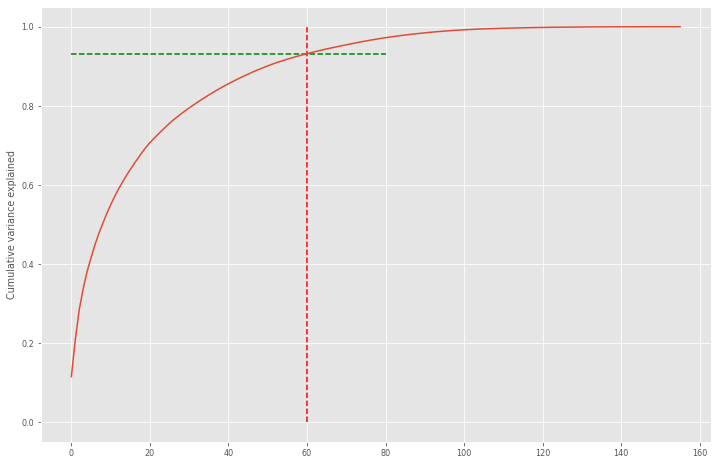

In [ ]:
# Making a scree plot for the explained variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()


##### Based on the above analysis, around 60 features explains about 93.17% variance. So, perform PCA with 70 features

In [ ]:
pca_final = IncrementalPCA(n_components=60)

In [ ]:
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

### Logistic Regression with Principal components

In [ ]:
#GridSearchCv for hyperparameter tuning

lr_pca = LogisticRegression(class_weight='balanced')

params = {'penalty':['l1','l2'],
          'C':[0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,20,30]}

lr_grid_pca = GridSearchCV(estimator=lr_pca,
                           param_grid=params,
                           scoring='recall',
                           cv=4,
                           n_jobs=-1, verbose=1)





In [ ]:
# Fit the model

lr_grid_pca.fit(X_train_pca,y_train)


Fitting 4 folds for each of 22 candidates, totalling 88 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    4.1s finished


GridSearchCV(cv=4, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20,
                               30],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [ ]:
#Best result parameters

lr_grid_pca.best_estimator_

LogisticRegression(C=0.01, class_weight='balanced')

In [ ]:
#Best score
lr_grid_pca.best_score_

0.8244770580296896

In [ ]:
#Predict with test data
y_pred_pca = lr_grid_pca.predict(X_test_pca)

In [ ]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_pca)
print(cm)

accuracy = round(accuracy_score(y_test, y_pred_pca),2)

[[6667 1575]
 [ 120  662]]


In [ ]:
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8242
           1       0.30      0.85      0.44       782

    accuracy                           0.81      9024
   macro avg       0.64      0.83      0.66      9024
weighted avg       0.92      0.81      0.85      9024



In [ ]:
column_names = ['Model', 'Accuracy', 'Sensitivity','Specificity','Precision']
pca_results = pd.DataFrame(columns = column_names)


In [ ]:
def addResults(index,model,cm,accuracy):
    sensi = round((cm[1,1]/float(cm[1,1] + cm[1,0])),2)
    speci = round((cm[0,0]/float(cm[0,0] + cm[0,1])),2)
    preci = round((cm[1,1]/float(cm[1,1] + cm[0,1])),2)
    pca_results.loc[index] =[model,accuracy,sensi,speci,preci]
    return pca_results


In [ ]:
addResults(0,'LogisticRegression',cm,accuracy)

,Model,Accuracy,Sensitivity,Specificity,Precision
0,LogisticRegression,0.81,0.85,0.81,0.3


### XGBoost with Principal components

In [ ]:
#GridSearchCv for hyperparameter tuning

#scale_pos_weight = total_negative_examples (class 0) / total_positive_examples (class 1)

xg_pca = XGBClassifier(learning_rate=0.1,objective='binary:logistic',scale_pos_weight=9,seed=27)

params = {
    'max_depth': [2,3,5,10,20],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05],
    'n_estimators': [10, 25, 50, 100],
    'subsample': [0.3, 0.6, 0.9]
}

xg_grid_pca = GridSearchCV(estimator = xg_pca,
                        param_grid = params,
                        scoring='recall',
                        n_jobs=-1,
                        cv=3,
                        verbose=1)

In [ ]:
# Fit the model

xg_grid_pca.fit(X_train_pca,y_train)


Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 33.1min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=9, seed=27,
                                     subsample=None, tree_method=

In [ ]:
#best result parameters

xg_grid_pca.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=27,
              reg_alpha=0.05, reg_lambda=1, scale_pos_weight=9, seed=27,
              subsample=0.3, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [ ]:
#Best score
xg_grid_pca.best_score_

0.7690657605711149

In [ ]:
#Predict with test data
y_pred_pca = xg_grid_pca.predict(X_test_pca)

In [ ]:
# create confusion matrix
cm = confusion_matrix(y_test, y_pred_pca)
print(cm)

accuracy = round(accuracy_score(y_test, y_pred_pca),2)

[[7082 1160]
 [ 156  626]]


In [ ]:
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      8242
           1       0.35      0.80      0.49       782

    accuracy                           0.85      9024
   macro avg       0.66      0.83      0.70      9024
weighted avg       0.92      0.85      0.88      9024



In [ ]:
addResults(1,'XGBClassifier',cm,accuracy)

,Model,Accuracy,Sensitivity,Specificity,Precision
0,LogisticRegression,0.81,0.85,0.81,0.30
1,XGBClassifier,0.85,0.80,0.86,0.35


### Random Forest with Principal components

In [ ]:
#GridSearchCv for hyperparameter tuning

rf_pca = RandomForestClassifier(class_weight="balanced",random_state=42)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

rf_grid_pca = GridSearchCV(estimator = rf_pca,
                        param_grid = params,
                        scoring='recall',
                        n_jobs=-1,
                        cv=3,
                        verbose=1)

In [ ]:
# Fit the model

rf_grid_pca.fit(X_train_pca,y_train)


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  4.7min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [ ]:
#best result parameters

rf_grid_pca.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=3,
                       min_samples_leaf=50, n_estimators=50, random_state=42)

In [ ]:
#Best score
rf_grid_pca.best_score_

0.7822326873609065

In [ ]:
#Predict with test data
y_pred_pca = rf_grid_pca.predict(X_test_pca)

In [ ]:
# create confusion matrix
cm = confusion_matrix(y_test, y_pred_pca)
print(cm)

accuracy = round(accuracy_score(y_test, y_pred_pca),2)

[[6642 1600]
 [ 163  619]]


In [ ]:
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.98      0.81      0.88      8242
           1       0.28      0.79      0.41       782

    accuracy                           0.80      9024
   macro avg       0.63      0.80      0.65      9024
weighted avg       0.92      0.80      0.84      9024



In [ ]:
addResults(2,'RandomForestClassifier',cm,accuracy)

,Model,Accuracy,Sensitivity,Specificity,Precision
0,LogisticRegression,0.81,0.85,0.81,0.30
1,XGBClassifier,0.85,0.80,0.86,0.35
2,RandomForestClassifier,0.80,0.79,0.81,0.28


### Random Forest without PCA

In [ ]:
#GridSearchCv for hyperparameter tuning

rf = RandomForestClassifier(class_weight="balanced",random_state=42)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

rf_grid = GridSearchCV(estimator = rf,
                        param_grid = params,
                        scoring='recall',
                        n_jobs=-1,
                        cv=3,
                        verbose=1)

In [ ]:
# Fit the model

rf_grid.fit(X_train,y_train)


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  4.0min finished


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [ ]:
#best result parameters

rf_best = rf_grid.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=200, n_estimators=25, random_state=42)

In [ ]:
#Best score
rf_grid.best_score_

0.7855248706610017

In [ ]:
#Predict with test data
y_pred = rf_grid.predict(X_test)

In [ ]:
# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = round(accuracy_score(y_test, y_pred),2)

[[7437  805]
 [ 164  618]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8242
           1       0.43      0.79      0.56       782

    accuracy                           0.89      9024
   macro avg       0.71      0.85      0.75      9024
weighted avg       0.93      0.89      0.91      9024



In [ ]:
addResults(3,'RandomForestClassifierWithoutPCA',cm,accuracy)

,Model,Accuracy,Sensitivity,Specificity,Precision
0,LogisticRegression,0.81,0.85,0.81,0.30
1,XGBClassifier,0.85,0.80,0.86,0.35
2,RandomForestClassifier,0.80,0.79,0.81,0.28
3,RandomForestClassifierWithoutPCA,0.89,0.79,0.90,0.43


#### Import Features

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
}).sort_values(by="Imp", ascending=False)
imp_df['Varname'].head(10)

80              total_ic_mou_8
53              total_og_mou_8
65                loc_ic_mou_8
140    total_rech_amt_churnPhs
14               roam_og_mou_8
98              max_rech_amt_8
17            loc_og_t2t_mou_8
2                       arpu_8
56            loc_ic_t2t_mou_8
101         last_day_rch_amt_8
Name: Varname, dtype: object

### Logistic Regression without PCA

In [ ]:
import statsmodels.api as sm

#### Feature Selection Using RFE

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

X_train.columns[rfe.support_]

Index(['onnet_mou_7', 'offnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_8',
       'total_ic_mou_8', 'count_rech_2g_8', 'sachet_2g_8', 'fb_user_8_1.0'],
      dtype='object')

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 103),
 ('arpu_7', False, 13),
 ('arpu_8', False, 30),
 ('onnet_mou_6', False, 27),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 58),
 ('offnet_mou_6', False, 74),
 ('offnet_mou_7', False, 4),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 106),
 ('roam_ic_mou_7', False, 76),
 ('roam_ic_mou_8', False, 138),
 ('roam_og_mou_6', False, 75),
 ('roam_og_mou_7', False, 125),
 ('roam_og_mou_8', False, 59),
 ('loc_og_t2t_mou_6', False, 134),
 ('loc_og_t2t_mou_7', False, 17),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 101),
 ('loc_og_t2m_mou_7', False, 9),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 107),
 ('loc_og_t2f_mou_7', False, 25),
 ('loc_og_t2f_mou_8', False, 77),
 ('loc_og_t2c_mou_6', False, 131),
 ('loc_og_t2c_mou_7', False, 133),
 ('loc_og_t2c_mou_8', False, 85),
 ('loc_og_mou_6', False, 34),
 ('loc_og_mou_7', False, 18),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 28),
 ('std_og_t2t_mou_7', True, 1),
 ('s

In [ ]:
rfe_Cols = X_train.columns[rfe.support_]
rfe_Cols

Index(['onnet_mou_7', 'offnet_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_8',
       'total_ic_mou_8', 'count_rech_2g_8', 'sachet_2g_8', 'fb_user_8_1.0'],
      dtype='object')

##### Model 1

In [ ]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[rfe_Cols])), family = sm.families.Binomial())
m1 = logm1.fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21054
Model:                            GLM   Df Residuals:                    21038
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4077.6
Date:                Wed, 09 Sep 2020   Deviance:                       8155.2
Time:                        08:34:04   Pearson chi2:                 4.45e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.3445      0.064    -51.907      0.000      -3.471      -3.218
onnet_mou_7          0.7386      0.109      6.790      0.000       0.525       0.952
offnet_mou_8         0.5319      0.103      5.147      0.000       0.329       0.734
loc_og_t2t_mou_8    -1.0219      0.238     -4.296      0.000      -1.488      -0.556
loc_og_t2m_mou_8    -1.5669      0.269     -5.824      0.000      -2.094      -1.040
loc_og_mou_8         3.8321      0.384      9.977      0.000       3.079       4.585
std_og_t2t_mou_7    -0.7325      0.113     -6.507      0.000      -0.953      -0.512
std_og_t2t_mou_8    -1.7907      0.211     -8.501      0.000      -2.204      -1.378
std_og_t2m_mou_8    -2.2711      0.209    -10.861      0.000      -2.681      -1.861
std_og_mou_7         0.5407      0.055      9.882      0.000       0.433       0.648
std_og_mou_8         7.2254      0.353     20.449      0.000       6.533       7.918
total_og_mou_8      -6.2174      0.280    -22.223      0.000      -6.766      -5.669
total_ic_mou_8      -0.9805      0.095    -10.344      0.000      -1.166      -0.795
count_rech_2g_8     -1.0279      0.334     -3.082      0.002      -1.682      -0.374
sachet_2g_8          1.0090      0.324      3.114      0.002       0.374       1.644
fb_user_8_1.0       -1.3909      0.107    -13.009      0.000      -1.600      -1.181
====================================================================================
"""

In [ ]:
##### Checking VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIFs for the new model

def calculateVIF(df):
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

calculateVIF(X_train[rfe_Cols])

,Features,VIF
9,std_og_mou_8,100.69
4,loc_og_mou_8,65.79
10,total_og_mou_8,49.67
7,std_og_t2m_mou_8,35.60
6,std_og_t2t_mou_8,29.54
12,count_rech_2g_8,22.97
3,loc_og_t2m_mou_8,22.11
13,sachet_2g_8,21.75
1,offnet_mou_8,20.80
5,std_og_t2t_mou_7,14.88


In [ ]:
#Drop 'std_og_mou_8' as VIF is very high
rfe_Cols = rfe_Cols.drop('std_og_mou_8',1)

##### Model 2

In [ ]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train[rfe_Cols])), family = sm.families.Binomial())
m2 = logm2.fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21054
Model:                            GLM   Df Residuals:                    21039
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4197.6
Date:                Wed, 09 Sep 2020   Deviance:                       8395.3
Time:                        08:34:04   Pearson chi2:                 3.64e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.4387      0.065    -52.511      0.000      -3.567      -3.310
onnet_mou_7          0.6646      0.107      6.232      0.000       0.456       0.874
offnet_mou_8         0.7409      0.103      7.183      0.000       0.539       0.943
loc_og_t2t_mou_8    -1.3199      0.202     -6.532      0.000      -1.716      -0.924
loc_og_t2m_mou_8    -1.9372      0.214     -9.032      0.000      -2.358      -1.517
loc_og_mou_8         4.2158      0.317     13.290      0.000       3.594       4.838
std_og_t2t_mou_7    -0.6991      0.111     -6.276      0.000      -0.917      -0.481
std_og_t2t_mou_8     2.6537      0.167     15.885      0.000       2.326       2.981
std_og_t2m_mou_8     1.7612      0.189      9.296      0.000       1.390       2.132
std_og_mou_7         0.5586      0.055     10.159      0.000       0.451       0.666
total_og_mou_8      -5.7897      0.282    -20.523      0.000      -6.343      -5.237
total_ic_mou_8      -1.1708      0.097    -12.040      0.000      -1.361      -0.980
count_rech_2g_8     -1.1447      0.336     -3.405      0.001      -1.804      -0.486
sachet_2g_8          1.0945      0.327      3.350      0.001       0.454       1.735
fb_user_8_1.0       -1.3543      0.104    -12.972      0.000      -1.559      -1.150
====================================================================================
"""

In [ ]:
##### Checking VIFs

calculateVIF(X_train[rfe_Cols])

,Features,VIF
4,loc_og_mou_8,55.50
9,total_og_mou_8,29.31
11,count_rech_2g_8,22.97
12,sachet_2g_8,21.75
3,loc_og_t2m_mou_8,21.65
7,std_og_t2m_mou_8,21.44
1,offnet_mou_8,20.79
5,std_og_t2t_mou_7,14.88
6,std_og_t2t_mou_8,13.80
2,loc_og_t2t_mou_8,13.36


In [ ]:
#Drop 'loc_og_mou_8' as VIF is very high
rfe_Cols = rfe_Cols.drop('loc_og_mou_8',1)

##### Model 3

In [ ]:
logm3 = sm.GLM(y_train,(sm.add_constant(X_train[rfe_Cols])), family = sm.families.Binomial())
m3 = logm3.fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21054
Model:                            GLM   Df Residuals:                    21040
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4246.1
Date:                Wed, 09 Sep 2020   Deviance:                       8492.3
Time:                        08:34:05   Pearson chi2:                 6.73e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.4872      0.066    -52.783      0.000      -3.617      -3.358
onnet_mou_7          0.6711      0.107      6.285      0.000       0.462       0.880
offnet_mou_8         0.8731      0.106      8.250      0.000       0.666       1.081
loc_og_t2t_mou_8     0.8853      0.114      7.766      0.000       0.662       1.109
loc_og_t2m_mou_8     0.8972      0.130      6.925      0.000       0.643       1.151
std_og_t2t_mou_7    -0.7060      0.111     -6.341      0.000      -0.924      -0.488
std_og_t2t_mou_8     2.7143      0.182     14.931      0.000       2.358       3.071
std_og_t2m_mou_8     1.7054      0.205      8.315      0.000       1.303       2.107
std_og_mou_7         0.5463      0.055      9.969      0.000       0.439       0.654
total_og_mou_8      -5.9254      0.310    -19.121      0.000      -6.533      -5.318
total_ic_mou_8      -1.2534      0.102    -12.257      0.000      -1.454      -1.053
count_rech_2g_8     -1.1778      0.337     -3.491      0.000      -1.839      -0.517
sachet_2g_8          1.1091      0.328      3.381      0.001       0.466       1.752
fb_user_8_1.0       -1.3466      0.104    -12.943      0.000      -1.551      -1.143
====================================================================================
"""

In [ ]:
##### Checking VIFs

calculateVIF(X_train[rfe_Cols])

,Features,VIF
10,count_rech_2g_8,22.97
8,total_og_mou_8,22.37
11,sachet_2g_8,21.75
1,offnet_mou_8,20.23
6,std_og_t2m_mou_8,17.01
4,std_og_t2t_mou_7,14.78
5,std_og_t2t_mou_8,11.21
0,onnet_mou_7,10.85
3,loc_og_t2m_mou_8,7.74
7,std_og_mou_7,5.73


In [ ]:
#Drop 'count_rech_2g_8' as VIF is very high
rfe_Cols = rfe_Cols.drop('count_rech_2g_8',1)

##### Model 4

In [ ]:
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[rfe_Cols])), family = sm.families.Binomial())
m4 = logm4.fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21054
Model:                            GLM   Df Residuals:                    21041
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4253.8
Date:                Wed, 09 Sep 2020   Deviance:                       8507.6
Time:                        08:34:05   Pearson chi2:                 8.05e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.4066      0.062    -55.019      0.000      -3.528      -3.285
onnet_mou_7          0.6752      0.107      6.313      0.000       0.466       0.885
offnet_mou_8         0.8800      0.107      8.244      0.000       0.671       1.089
loc_og_t2t_mou_8     0.8939      0.114      7.819      0.000       0.670       1.118
loc_og_t2m_mou_8     0.9072      0.130      6.954      0.000       0.652       1.163
std_og_t2t_mou_7    -0.7101      0.111     -6.369      0.000      -0.929      -0.492
std_og_t2t_mou_8     2.7431      0.183     15.015      0.000       2.385       3.101
std_og_t2m_mou_8     1.7266      0.207      8.357      0.000       1.322       2.131
std_og_mou_7         0.5449      0.055      9.955      0.000       0.438       0.652
total_og_mou_8      -5.9739      0.311    -19.179      0.000      -6.584      -5.363
total_ic_mou_8      -1.2620      0.102    -12.323      0.000      -1.463      -1.061
sachet_2g_8         -0.0177      0.046     -0.381      0.703      -0.109       0.073
fb_user_8_1.0       -1.5253      0.096    -15.872      0.000      -1.714      -1.337
====================================================================================
"""

In [ ]:
#Drop 'sachet_2g_8' as p-Value is very high
rfe_Cols = rfe_Cols.drop('sachet_2g_8',1)

##### Model 5

In [ ]:
logm5 = sm.GLM(y_train,(sm.add_constant(X_train[rfe_Cols])), family = sm.families.Binomial())
m5 = logm5.fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21054
Model:                            GLM   Df Residuals:                    21042
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4253.9
Date:                Wed, 09 Sep 2020   Deviance:                       8507.7
Time:                        08:34:05   Pearson chi2:                 8.33e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.4035      0.061    -55.461      0.000      -3.524      -3.283
onnet_mou_7          0.6756      0.107      6.315      0.000       0.466       0.885
offnet_mou_8         0.8804      0.107      8.250      0.000       0.671       1.090
loc_og_t2t_mou_8     0.8953      0.114      7.832      0.000       0.671       1.119
loc_og_t2m_mou_8     0.9087      0.130      6.966      0.000       0.653       1.164
std_og_t2t_mou_7    -0.7107      0.112     -6.373      0.000      -0.929      -0.492
std_og_t2t_mou_8     2.7477      0.182     15.065      0.000       2.390       3.105
std_og_t2m_mou_8     1.7299      0.206      8.378      0.000       1.325       2.135
std_og_mou_7         0.5451      0.055      9.957      0.000       0.438       0.652
total_og_mou_8      -5.9824      0.311    -19.247      0.000      -6.592      -5.373
total_ic_mou_8      -1.2625      0.102    -12.324      0.000      -1.463      -1.062
fb_user_8_1.0       -1.5374      0.091    -16.902      0.000      -1.716      -1.359
====================================================================================
"""

In [ ]:
##### Checking VIFs

calculateVIF(X_train[rfe_Cols])

,Features,VIF
8,total_og_mou_8,22.35
1,offnet_mou_8,20.20
6,std_og_t2m_mou_8,16.99
4,std_og_t2t_mou_7,14.78
5,std_og_t2t_mou_8,11.21
0,onnet_mou_7,10.85
3,loc_og_t2m_mou_8,7.74
7,std_og_mou_7,5.73
2,loc_og_t2t_mou_8,4.33
9,total_ic_mou_8,1.37


In [ ]:
#Drop 'total_og_mou_8' as VIF is very high
rfe_Cols = rfe_Cols.drop('total_og_mou_8',1)

##### Model 6

In [ ]:
logm6 = sm.GLM(y_train,(sm.add_constant(X_train[rfe_Cols])), family = sm.families.Binomial())
m6 = logm6.fit()
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21054
Model:                            GLM   Df Residuals:                    21043
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4467.8
Date:                Wed, 09 Sep 2020   Deviance:                       8935.5
Time:                        08:34:05   Pearson chi2:                 3.67e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.3502      0.065    -51.851      0.000      -3.477      -3.224
onnet_mou_7          0.5103      0.099      5.129      0.000       0.315       0.705
offnet_mou_8         0.9572      0.097      9.823      0.000       0.766       1.148
loc_og_t2t_mou_8    -0.4868      0.081     -6.022      0.000      -0.645      -0.328
loc_og_t2m_mou_8    -0.7880      0.083     -9.457      0.000      -0.951      -0.625
std_og_t2t_mou_7    -0.5634      0.105     -5.377      0.000      -0.769      -0.358
std_og_t2t_mou_8    -0.6776      0.056    -12.000      0.000      -0.788      -0.567
std_og_t2m_mou_8    -1.5830      0.101    -15.723      0.000      -1.780      -1.386
std_og_mou_7         0.5033      0.053      9.420      0.000       0.399       0.608
total_ic_mou_8      -2.0645      0.103    -19.985      0.000      -2.267      -1.862
fb_user_8_1.0       -1.6195      0.090    -17.957      0.000      -1.796      -1.443
====================================================================================
"""

In [ ]:
##### Checking VIFs

calculateVIF(X_train[rfe_Cols])

,Features,VIF
1,offnet_mou_8,18.09
6,std_og_t2m_mou_8,14.97
4,std_og_t2t_mou_7,14.12
0,onnet_mou_7,10.26
3,loc_og_t2m_mou_8,6.99
7,std_og_mou_7,5.70
5,std_og_t2t_mou_8,2.99
2,loc_og_t2t_mou_8,2.92
8,total_ic_mou_8,1.37
9,fb_user_8_1.0,1.04


In [ ]:
#Drop 'offnet_mou_8' as VIF is very high
rfe_Cols = rfe_Cols.drop('offnet_mou_8',1)

##### Model 7

In [ ]:
logm7 = sm.GLM(y_train,(sm.add_constant(X_train[rfe_Cols])), family = sm.families.Binomial())
m7 = logm7.fit()
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21054
Model:                            GLM   Df Residuals:                    21044
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4518.0
Date:                Wed, 09 Sep 2020   Deviance:                       9036.0
Time:                        08:34:05   Pearson chi2:                 7.40e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.3963      0.066    -51.650      0.000      -3.525      -3.267
onnet_mou_7          0.6248      0.099      6.311      0.000       0.431       0.819
loc_og_t2t_mou_8    -0.5609      0.081     -6.895      0.000      -0.720      -0.401
loc_og_t2m_mou_8    -0.2400      0.060     -4.023      0.000      -0.357      -0.123
std_og_t2t_mou_7    -0.6883      0.104     -6.607      0.000      -0.893      -0.484
std_og_t2t_mou_8    -0.6988      0.057    -12.345      0.000      -0.810      -0.588
std_og_t2m_mou_8    -0.7888      0.058    -13.519      0.000      -0.903      -0.674
std_og_mou_7         0.5249      0.053      9.836      0.000       0.420       0.629
total_ic_mou_8      -2.1831      0.105    -20.860      0.000      -2.388      -1.978
fb_user_8_1.0       -1.5796      0.089    -17.831      0.000      -1.753      -1.406
====================================================================================
"""

In [ ]:
##### Checking VIFs

calculateVIF(X_train[rfe_Cols])

,Features,VIF
3,std_og_t2t_mou_7,14.02
0,onnet_mou_7,10.20
6,std_og_mou_7,5.67
4,std_og_t2t_mou_8,2.98
1,loc_og_t2t_mou_8,2.90
5,std_og_t2m_mou_8,2.65
2,loc_og_t2m_mou_8,1.38
7,total_ic_mou_8,1.37
8,fb_user_8_1.0,1.04


In [ ]:
#Drop 'std_og_t2t_mou_7' as VIF is very high
rfe_Cols = rfe_Cols.drop('std_og_t2t_mou_7',1)

##### Model 8

In [ ]:
logm8 = sm.GLM(y_train,(sm.add_constant(X_train[rfe_Cols])), family = sm.families.Binomial())
m8 = logm8.fit()
m8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21054
Model:                            GLM   Df Residuals:                    21045
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4540.4
Date:                Wed, 09 Sep 2020   Deviance:                       9080.9
Time:                        08:34:06   Pearson chi2:                 6.97e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.3921      0.066    -51.516      0.000      -3.521      -3.263
onnet_mou_7          0.0671      0.050      1.337      0.181      -0.031       0.166
loc_og_t2t_mou_8    -0.2611      0.063     -4.138      0.000      -0.385      -0.137
loc_og_t2m_mou_8    -0.2720      0.060     -4.498      0.000      -0.391      -0.153
std_og_t2t_mou_8    -0.8186      0.056    -14.692      0.000      -0.928      -0.709
std_og_t2m_mou_8    -0.7120      0.056    -12.715      0.000      -0.822      -0.602
std_og_mou_7         0.3935      0.049      8.025      0.000       0.297       0.490
total_ic_mou_8      -2.2279      0.105    -21.210      0.000      -2.434      -2.022
fb_user_8_1.0       -1.5827      0.088    -17.884      0.000      -1.756      -1.409
====================================================================================
"""

In [ ]:
#Drop 'onnet_mou_7' as p-Value is very high
rfe_Cols = rfe_Cols.drop('onnet_mou_7',1)

##### Model 9

In [ ]:
logm9 = sm.GLM(y_train,(sm.add_constant(X_train[rfe_Cols])), family = sm.families.Binomial())
m9 = logm9.fit()
m9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21054
Model:                            GLM   Df Residuals:                    21046
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4541.3
Date:                Wed, 09 Sep 2020   Deviance:                       9082.7
Time:                        08:34:06   Pearson chi2:                 7.61e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.3934      0.066    -51.509      0.000      -3.522      -3.264
loc_og_t2t_mou_8    -0.2298      0.059     -3.908      0.000      -0.345      -0.115
loc_og_t2m_mou_8    -0.2771      0.061     -4.578      0.000      -0.396      -0.158
std_og_t2t_mou_8    -0.7858      0.050    -15.856      0.000      -0.883      -0.689
std_og_t2m_mou_8    -0.7457      0.050    -14.781      0.000      -0.845      -0.647
std_og_mou_7         0.4367      0.037     11.813      0.000       0.364       0.509
total_ic_mou_8      -2.2332      0.105    -21.253      0.000      -2.439      -2.027
fb_user_8_1.0       -1.5864      0.088    -17.933      0.000      -1.760      -1.413
====================================================================================
"""

In [ ]:
##### Checking VIFs

calculateVIF(X_train[rfe_Cols])

,Features,VIF
4,std_og_mou_7,2.87
2,std_og_t2t_mou_8,1.79
3,std_og_t2m_mou_8,1.78
1,loc_og_t2m_mou_8,1.37
5,total_ic_mou_8,1.36
0,loc_og_t2t_mou_8,1.16
6,fb_user_8_1.0,1.04


##### Assessing the model with StatsModels

In [ ]:
y_train_pred = m9.predict(sm.add_constant(X_train[rfe_Cols]))
y_train_pred[:10]

68209    0.052521
84689    0.081515
55746    0.037060
99629    0.174408
13486    0.121602
23849    0.024603
59593    0.032792
30880    0.029264
22221    0.002312
49121    0.123335
dtype: float64

In [ ]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Converted_Prob
68209,0,0.052521
84689,0,0.081515
55746,0,0.037060
99629,0,0.174408
13486,0,0.121602


In [ ]:
##### Creating new column 'predicted' with 1 if Converted_Prob	> 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Converted_Prob,predicted
68209,0,0.052521,0
84689,0,0.081515,0
55746,0,0.037060,0
99629,0,0.174408,0
13486,0,0.121602,0


In [ ]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[19100   131]
 [ 1665   158]]


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9146955447895887


In [ ]:
## Metrics beyond simply accuracy
def calculateMatrix (confusion):
    TP = confusion[1,1] # true positive
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives



    # Let's see the sensitivity of our logistic regression model
    sentitivity = round((TP / float(TP+FN))*100,2)
    print('Sentitivity : ', sentitivity)



    # Let us calculate specificity
    specificity = round((TN / float(TN+FP))*100,2)
    print('Specificity : ', specificity)



    # Calculate false postive rate - predicting churn when customer does not have churned
    falsePositive = round((FP/ float(TN+FP))*100,2)
    print('False Positive : ', falsePositive)



    # positive predictive value
    positivePredictiveValue = round((TP / float(TP+FP))*100,2)
    print('Positive Predictive Value : ', positivePredictiveValue)

    # Negative predictive value
    negativePredictiveValue = round((TN / float(TN+ FN))*100,2)
    print('Negative Predictive Value : ', negativePredictiveValue)



    #  Precision
    precision = round((TP / float(TP + FP))*100,2)
    print ('Precision  : ', precision)

In [ ]:
calculateMatrix(confusion)

Sentitivity :  8.67
Specificity :  99.32
False Positive :  0.68
Positive Predictive Value :  54.67
Negative Predictive Value :  91.98
Precision  :  54.67


##### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Converted_Prob, drop_intermediate = False )

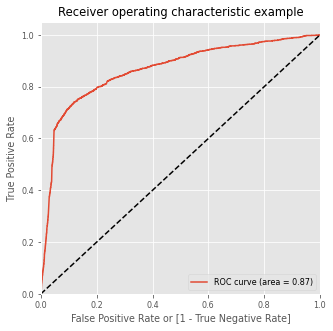

In [ ]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Converted_Prob)

##### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [ ]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
68209,0,0.052521,0,1,0,0,0,0,0,0,0,0,0
84689,0,0.081515,0,1,0,0,0,0,0,0,0,0,0
55746,0,0.037060,0,1,0,0,0,0,0,0,0,0,0
99629,0,0.174408,0,1,1,0,0,0,0,0,0,0,0
13486,0,0.121602,0,1,1,0,0,0,0,0,0,0,0


In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.086587  1.000000  0.000000
0.1   0.1  0.789874  0.800329  0.788883
0.2   0.2  0.890710  0.707076  0.908117
0.3   0.3  0.924432  0.633022  0.952057
0.4   0.4  0.915076  0.222710  0.980708
0.5   0.5  0.914696  0.086670  0.993188
0.6   0.6  0.914648  0.037301  0.997816
0.7   0.7  0.914031  0.013165  0.999428
0.8   0.8  0.913793  0.006583  0.999792
0.9   0.9  0.913413  0.000000  1.000000


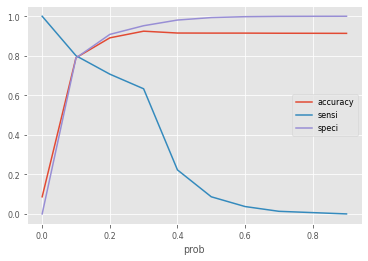

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Churn,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
68209,0,0.052521,0,1,0,0,0,0,0,0,0,0,0,0
84689,0,0.081515,0,1,0,0,0,0,0,0,0,0,0,0
55746,0,0.037060,0,1,0,0,0,0,0,0,0,0,0,0
99629,0,0.174408,0,1,1,0,0,0,0,0,0,0,0,1
13486,0,0.121602,0,1,1,0,0,0,0,0,0,0,0,1


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7898736582122162

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[15171,  4060],
       [  364,  1459]])

In [ ]:
calculateMatrix (confusion2)

Sentitivity :  80.03
Specificity :  78.89
False Positive :  21.11
Positive Predictive Value :  26.44
Negative Predictive Value :  97.66
Precision  :  26.44


##### Making predictions on the test set

In [ ]:
X_test = X_test[rfe_Cols]
X_test.head()

,loc_og_t2t_mou_8,loc_og_t2m_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_mou_7,total_ic_mou_8,fb_user_8_1.0
15017,-0.332019,-0.778594,-0.359125,-0.509301,-0.418221,-0.025492,0
10351,0.246989,0.888314,-0.447868,0.309805,-0.157570,0.590776,0
60684,-0.551888,-0.814307,-0.467503,-0.509301,-0.462904,-0.911111,1
72122,-0.341923,-0.347945,-0.445367,-0.428220,-0.462904,-0.911111,0
96028,-0.322184,-0.103753,-0.467503,-0.509301,-0.676953,0.781117,1


In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
#### Making predictions on the test set

y_test_pred = m9.predict(X_test_sm)
y_test_pred[:10]

15017    0.071422
10351    0.006940
60684    0.114295
72122    0.328154
96028    0.002087
16275    0.000317
98493    0.034014
98208    0.001173
2185     0.090879
94759    0.004289
dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
# Let's see the head
y_pred_1.head()

,0
15017,0.071422
10351,0.006940
60684,0.114295
72122,0.328154
96028,0.002087


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
15017,0
10351,0
60684,0
72122,1
96028,0


In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Churn,0
15017,0,0.071422
10351,0,0.006940
60684,0,0.114295
72122,1,0.328154
96028,0,0.002087


In [ ]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Churn,Converted_Prob
15017,0,0.071422
10351,0,0.006940
60684,0,0.114295
72122,1,0.328154
96028,0,0.002087


In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.10 else 0)
y_pred_final.head()

,Churn,Converted_Prob,final_predicted
15017,0,0.071422,0
10351,0,0.006940,0
60684,0,0.114295,1
72122,1,0.328154,1
96028,0,0.002087,0


In [ ]:
# AUC score
auc_score = round(metrics.roc_auc_score( y_pred_final.Churn, y_pred_final.final_predicted ),2)
auc_score

0.8

In [ ]:
# Let's check the overall accuracy.
accuracy2 = round(metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted),2)
accuracy2

0.79

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[6520, 1722],
       [ 153,  629]])

In [ ]:
calculateMatrix (confusion2)

Sentitivity :  80.43
Specificity :  79.11
False Positive :  20.89
Positive Predictive Value :  26.75
Negative Predictive Value :  97.71
Precision  :  26.75


In [ ]:
addResults(4,'LogisticRegressionWithoutPCA',confusion2,accuracy2)

,Model,Accuracy,Sensitivity,Specificity,Precision
0,LogisticRegression,0.81,0.85,0.81,0.30
1,XGBClassifier,0.85,0.80,0.86,0.35
2,RandomForestClassifier,0.80,0.79,0.81,0.28
3,RandomForestClassifierWithoutPCA,0.89,0.79,0.90,0.43
4,LogisticRegressionWithoutPCA,0.79,0.80,0.79,0.27


In [ ]:
# Top Features
topFeatures = pd.DataFrame(m9.params)
topFeatures = topFeatures.iloc[1:,:]
topFeatures = topFeatures.reset_index()
topFeatures.columns=['Top Features','Coeffient']
topFeatures

,Top Features,Coeffient
0,loc_og_t2t_mou_8,-0.229801
1,loc_og_t2m_mou_8,-0.277110
2,std_og_t2t_mou_8,-0.785774
3,std_og_t2m_mou_8,-0.745745
4,std_og_mou_7,0.436739
5,total_ic_mou_8,-2.233207
6,fb_user_8_1.0,-1.586401


## Conclusion

In [ ]:
pca_results

,Model,Accuracy,Sensitivity,Specificity,Precision
0,LogisticRegression,0.81,0.85,0.81,0.30
1,XGBClassifier,0.85,0.80,0.86,0.35
2,RandomForestClassifier,0.80,0.79,0.81,0.28
3,RandomForestClassifierWithoutPCA,0.89,0.79,0.90,0.43
4,LogisticRegressionWithoutPCA,0.79,0.80,0.79,0.27


In [ ]:
topFeatures

,Top Features,Coeffient
0,loc_og_t2t_mou_8,-0.229801
1,loc_og_t2m_mou_8,-0.277110
2,std_og_t2t_mou_8,-0.785774
3,std_og_t2m_mou_8,-0.745745
4,std_og_mou_7,0.436739
5,total_ic_mou_8,-2.233207
6,fb_user_8_1.0,-1.586401


### Following are the top features

* loc_og_t2t_mou_8
* loc_og_t2m_mou_8
* std_og_t2t_mou_8
* std_og_t2m_mou_8
* std_og_mou_7
* total_ic_mou_8
* fb_user_8_1.0
    
    

###### Based on the above results Logistic Regression has very good Sensitivity/Recall for both with and without dimensionality reduction. So, we'll go with logistic regression with PCA for prediction and use logistic regression model without PCA to identifying important predictor attributes which help the business understand indicators of churn.

###### On the above observations we can recommend following strategies to manage customer churn.

1. Company needs to concentrate on consumers who have reduced their LOCAL and STD calls and provide them with special offers.
2. Company can also provide offers on packs like Facebook and other similar social networking sites to reduce the churn.